In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [112]:
data_path = "./input/"
train = pd.read_csv(data_path+"train.csv")
test = pd.read_csv(data_path+"test.csv")
full_set = pd.concat([train.drop(['breed_category','pet_category'],axis=1),test])
len(full_set)

26906

In [113]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [114]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [115]:
full_set['condition'] = full_set['condition'].fillna(3)

In [116]:
full_set['condition'].unique()

array([2., 1., 3., 0.])

<AxesSubplot:>

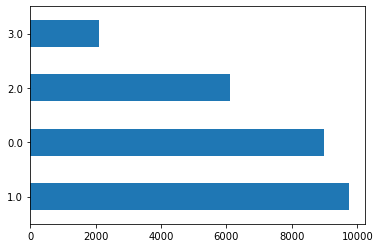

In [117]:
full_set['condition'].value_counts().plot(kind="barh")

<AxesSubplot:>

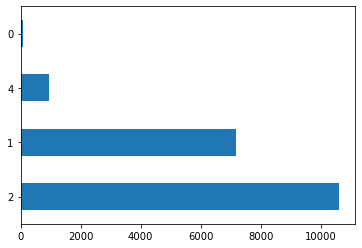

In [118]:
train['pet_category'].value_counts().plot(kind='barh')

<AxesSubplot:>

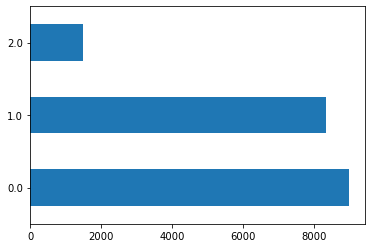

In [119]:
train['breed_category'].value_counts().plot(kind='barh')

<AxesSubplot:>

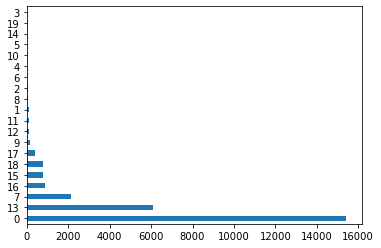

In [120]:
full_set['X1'].value_counts().plot(kind='barh')

<AxesSubplot:>

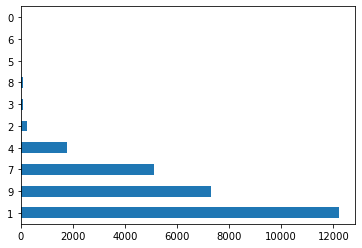

In [121]:
full_set['X2'].value_counts().plot(kind='barh')

In [122]:
full_set['issue_date'] = pd.to_datetime(full_set['issue_date'])

In [123]:
full_set['listing_date'] = pd.to_datetime(full_set['listing_date'])

In [124]:
full_set['listing_date']

0      2016-09-21 16:25:00
1      2018-12-27 17:47:00
2      2016-10-19 08:24:00
3      2019-01-25 18:30:00
4      2017-11-19 09:38:00
               ...        
8067   2017-03-10 14:56:00
8068   2018-02-12 00:00:00
8069   2017-01-04 17:19:00
8070   2017-07-20 18:19:00
8071   2017-02-28 16:47:00
Name: listing_date, Length: 26906, dtype: datetime64[ns]

In [125]:
duration = (full_set['listing_date'] - full_set['issue_date']).dt.days

In [126]:
full_set['duration'] = duration

In [127]:
full_set = full_set.drop(['issue_date','listing_date','pet_id'],axis=1)
full_set.head()

,condition,color_type,length(m),height(cm),X1,X2,duration
0,2.0,Brown Tabby,0.80,7.78,13,9,73
1,1.0,White,0.72,14.19,13,9,1862
2,3.0,Brown,0.15,40.90,15,4,752
3,1.0,White,0.62,17.82,0,1,755
4,2.0,Black,0.50,11.06,18,4,52


In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
labelencoder = LabelEncoder()
full_set['color_type'] = labelencoder.fit_transform(full_set['color_type'])

In [130]:
full_set.head()

,condition,color_type,length(m),height(cm),X1,X2,duration
0,2.0,18,0.80,7.78,13,9,73
1,1.0,53,0.72,14.19,13,9,1862
2,3.0,15,0.15,40.90,15,4,752
3,1.0,53,0.62,17.82,0,1,755
4,2.0,2,0.50,11.06,18,4,52


In [131]:
full_set['color_type'].nunique()

56

In [132]:
full_set['height(cm)'] = full_set['height(cm)']/100

In [133]:
full_set.head()

,condition,color_type,length(m),height(cm),X1,X2,duration
0,2.0,18,0.80,0.0778,13,9,73
1,1.0,53,0.72,0.1419,13,9,1862
2,3.0,15,0.15,0.4090,15,4,752
3,1.0,53,0.62,0.1782,0,1,755
4,2.0,2,0.50,0.1106,18,4,52


In [134]:
info = pd.DataFrame()
info['length(m)'] = [np.percentile(full_set['length(m)'],25*i) for i in range(1,4)]
info['height(cm)'] = [np.percentile(full_set['height(cm)'],25*i) for i in range(1,4)]
info['duration'] = [np.percentile(full_set['duration'],25*i) for i in range(1,4)]

In [135]:
info

,length(m),height(cm),duration
0,0.25,0.1621,120.0
1,0.50,0.2736,392.0
2,0.76,0.3878,1116.0


In [136]:
info.loc[3] = [2.5*info.loc[0,column] - 1.5*info.loc[2,column] for column in info.columns]
info.loc[4] = [2.5*info.loc[2,column] - 1.5*info.loc[0,column] for column in info.columns]
info

,length(m),height(cm),duration
0,0.250,0.16210,120.0
1,0.500,0.27360,392.0
2,0.760,0.38780,1116.0
3,-0.515,-0.17645,-1374.0
4,1.525,0.72635,2610.0


In [137]:
def range_part(column,value):
    if value > info.loc[4,column]:
        return 5
    elif value > info.loc[2,column]:
        return 4
    elif value > info.loc[1,column]:
        return 3
    elif value > info.loc[0,column]:
        return 2
    elif value > info.loc[3,column]:
        return 1
    else:
        return 0

In [138]:
from tqdm import tqdm
tqdm.pandas()
full_set['length_range'] = full_set['length(m)'].progress_apply(lambda x:range_part('length(m)',x))
full_set['height_range'] = full_set['height(cm)'].progress_apply(lambda x:range_part('height(cm)',x))
full_set['duration_range'] = full_set['duration'].progress_apply(lambda x:range_part('duration',x))
full_set

100%|██████████| 26906/26906 [00:01<00:00, 13804.59it/s]


,condition,color_type,length(m),height(cm),X1,X2,duration,length_range,height_range,duration_range
0,2.0,18,0.80,0.0778,13,9,73,4,1,1
1,1.0,53,0.72,0.1419,13,9,1862,3,1,4
2,3.0,15,0.15,0.4090,15,4,752,1,4,3
3,1.0,53,0.62,0.1782,0,1,755,3,2,3
4,2.0,2,0.50,0.1106,18,4,52,2,1,1
...,...,...,...,...,...,...,...,...,...,...
8067,2.0,15,0.82,0.3608,13,9,394,4,3,3
8068,0.0,48,0.49,0.2754,13,9,798,2,3,3
8069,0.0,2,0.98,0.3719,0,7,393,4,3,3
8070,3.0,2,0.79,0.2383,0,2,387,4,2,2


In [139]:
train_set = pd.DataFrame()
test_set = pd.DataFrame()
train_set = full_set.iloc[:len(train)]
test_set = full_set[len(train):]

In [140]:
train_set['breed_category'] = train['breed_category']
train_set['pet_category'] = train['pet_category']

In [141]:
train_set.head()

,condition,color_type,length(m),height(cm),X1,X2,duration,length_range,height_range,duration_range,breed_category,pet_category
0,2.0,18,0.80,0.0778,13,9,73,4,1,1,0.0,1
1,1.0,53,0.72,0.1419,13,9,1862,3,1,4,0.0,2
2,3.0,15,0.15,0.4090,15,4,752,1,4,3,2.0,4
3,1.0,53,0.62,0.1782,0,1,755,3,2,3,0.0,2
4,2.0,2,0.50,0.1106,18,4,52,2,1,1,0.0,1


In [145]:
test_set['pet_id'] = test['pet_id']
test_set.head()

,condition,color_type,length(m),height(cm),X1,X2,duration,length_range,height_range,duration_range,pet_id
0,0.0,2,0.87,0.4273,0,7,4404,4,4,5,ANSL_75005
1,1.0,38,0.06,0.0671,0,1,174,1,1,2,ANSL_76663
2,1.0,2,0.24,0.4121,0,7,1999,1,4,4,ANSL_58259
3,1.0,2,0.29,0.0846,7,1,1148,2,1,4,ANSL_67171
4,1.0,15,0.71,0.3092,0,7,463,3,3,3,ANSL_72871


In [146]:
train_set.to_csv('input/clean_train.csv')
test_set.to_csv('input/clean_test.csv')